In [3]:
import os
import zipfile
import matplotlib.pyplot as plt
import neo.io as ni
import neo as n
import zipfile
from neo.io import Spike2IO
import numpy as np
import inspect
import spikeinterface.full as si
import hdbscan
from probeinterface import generate_linear_probe
from probeinterface import Probe
from probeinterface.plotting import plot_probe






    

Worked with neo, because spike2 module did not have smr file reader

In [4]:


data_loc = "D://GIPSA Labwork Internship//spike_interface_primaries//RAWAT//Spikeme//Spikeme//sourcedata//502//ieeg//502-01.smr"



#using read_block method in the spike2io
reader = Spike2IO(filename=data_loc)
block = reader.read_block(block_index=0,load_waveforms=True)#the block containcs all the information of the experiment





In [ ]:
methods_list = [method for method in ni.__dict__ if callable(
    getattr(ni, method)) and not method.startswith("__")]
 
print("Methods using __dict__ attribute:", methods_list)

Methods using __dict__ attribute: ['Counter', 'NeuroshareIO', 'AlphaOmegaIO', 'AsciiImageIO', 'AsciiSignalIO', 'AsciiSpikeTrainIO', 'AxographIO', 'AxonaIO', 'AxonIO', 'BiocamIO', 'BlackrockIO', 'BlkIO', 'BCI2000IO', 'BrainVisionIO', 'BrainwareDamIO', 'BrainwareF32IO', 'BrainwareSrcIO', 'CedIO', 'EDFIO', 'ElanIO', 'ElphyIO', 'ExampleIO', 'IgorIO', 'IntanIO', 'KlustaKwikIO', 'KwikIO', 'MEArecIO', 'MaxwellIO', 'MedIO', 'MicromedIO', 'NeoMatlabIO', 'NestIO', 'NeuralynxIO', 'NeuroExplorerIO', 'NeuroScopeIO', 'NixIO', 'NixIOFr', 'NWBIO', 'OpenEphysIO', 'OpenEphysBinaryIO', 'PhyIO', 'PickleIO', 'PlexonIO', 'Plexon2IO', 'RawBinarySignalIO', 'RawMCSIO', 'Spike2IO', 'SpikeGadgetsIO', 'SpikeGLXIO', 'StimfitIO', 'TdtIO', 'TiffIO', 'WinEdrIO', 'WinWcpIO', 'current_io', 'get_io', 'list_candidate_ios']


In [48]:
block

Block with [<neo.core.segment.Segment object at 0x00000220A35A6280>] segments, [<neo.core.group.Group object at 0x00000220D395F190>] groups
annotations: {'system_id': 6}
file_origin: 'D://GIPSA Labwork Internship//spike_interface_primaries//RAWAT//Spikeme//Spikeme//sourcedata//502//ieeg//502-01.smr'
# segments (N=[<neo.core.segment.Segment object at 0x00000220A35A6280>])
0: Segment with [<AnalogSignal(array([[-0.00717163, -0.00091553],
       [-0.00686646, -0.00030518],
       [-0.00701904, -0.0012207 ],
       ...,
       [-0.0050354 ,  0.00808716],
       [-0.00564575,  0.00701904],
       [-0.00595093,  0.00686646]], dtype=float32) * dimensionless, [0.0 s, 1061.145765 s], sampling rate: 14814.814814814814 Hz)>] analogsignals, [<Event: @3.2080624999999996 s, @5.2080625 s, @7.2080625 s, @9.208062499999999 s, @11.208062499999999 s, @13.208062499999999 s, @15.208062499999999 s, @17.208062499999997 s, @19.208062499999997 s, @21.208062499999997 s, @23.208062499999997 s, @25.20806249999999

Trivial Plotting

Here I explored method segment and its attributes.

This is probably first optogenetic protocol as it somewhat depicts four y

In [5]:
signals = block.segments[0].analogsignals
y  =signals[0][:]


In [6]:
signalsss = block.segments[0].analogsignals[0]

In [7]:
time_data = signalsss.times

In [8]:
sampling_rate_data = signalsss.sampling_rate

In [9]:
signalsss.name

'Signal stream 0'

In [10]:
signal_magni = signalsss.magnitude

In [11]:
signal_magni.shape

(15720678, 2)

(-0.2, 0.2)

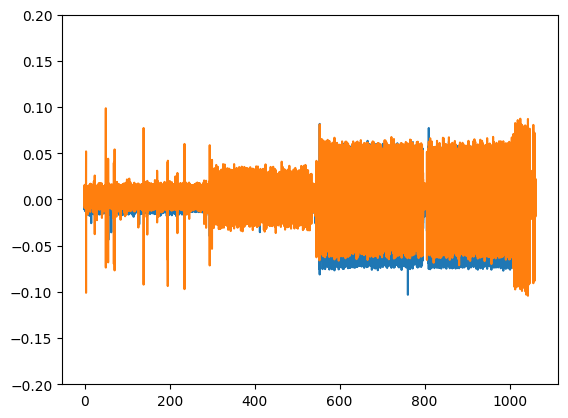

In [12]:
plt.plot(time_data,signal_magni)

plt.ylim(-0.2,0.2)


Using Spikeinterface module

In [15]:
full_raw_smr = si.read_spike2(data_loc)

In [16]:
full_raw_smr

Spike2RecordingExtractor: 2 channels - 14.8kHz - 1 segments - 15,720,678 samples 
                          1,061.15s (17.69 minutes) - int16 dtype - 59.97 MiB
  file_path: D:\GIPSA Labwork Internship\spike_interface_primaries\RAWAT\Spikeme\Spikeme\sourcedata\502\ieeg\502-01.smr

In [17]:
full_raw_smr

Spike2RecordingExtractor: 2 channels - 14.8kHz - 1 segments - 15,720,678 samples 
                          1,061.15s (17.69 minutes) - int16 dtype - 59.97 MiB
  file_path: D:\GIPSA Labwork Internship\spike_interface_primaries\RAWAT\Spikeme\Spikeme\sourcedata\502\ieeg\502-01.smr

In [18]:
fs = full_raw_smr.get_sampling_frequency()
trace_snippet = full_raw_smr.get_traces(start_frame=int(fs*0), end_frame=int(fs*2))

In [19]:
fs

14814.814814814814

The shape function shows how many channel ids are in the data. The index 1 of the shape gives the number of frames  and index 2 the number of channels. Apparently, there are no probes set in the smr file. So there is a possibility to skip the raw recording preprocessing as there are no indications to remove bad channels.

In [18]:
trace_snippet.shape

(29629, 2)

In [52]:
channeli_id = full_raw_smr.get_channel_ids()
print(channeli_id)

['0' '2']


In [53]:
num_channels = full_raw_smr.get_num_channels()
print(num_channels)

2


In [56]:
dur = full_raw_smr.get_total_duration()

In [64]:
num_channels = 2
sampling_frequency = fs  # in Hz
durations = dur  #  in s for 2 segments
num_segments = 1
num_timepoints = int(sampling_frequency * durations)

In [65]:
num_timepoints

15720677

In [66]:
traces0 = np.random.normal(0, 10, (num_timepoints, num_channels))

In [68]:
traces0

array([[-14.35532723, -15.14598085],
       [ 10.90190126, -21.57031246],
       [ -0.68287373,   7.49095031],
       ...,
       [ 17.67821652,  16.15139069],
       [  0.05876873,  11.42164638],
       [-17.28851675,   5.92966924]])

Basic preprocessing applied on the raw signal

In [112]:
recording_f = si.bandpass_filter(full_raw_smr, freq_min=3000, freq_max=5000)

In [113]:
recording_cmr = si.common_reference(recording_f, reference='global', operator='median')

In [114]:
recording_preprocessed = recording_cmr.save(format="binary")

Use cache_folder=C:\Users\Akshit\AppData\Local\Temp\spikeinterface_cache\tmp230jjv2m\YL6E759G
write_binary_recording with n_jobs = 1 and chunk_size = 14814


write_binary_recording:   0%|          | 0/1062 [00:00<?, ?it/s]

In [116]:
sorting_TDC = si.run_sorter(sorter_name="tridesclous2", recording=recording_preprocessed)
print(sorting_TDC)

SpikeSortingError: Spike sorting error trace:
Traceback (most recent call last):
  File "d:\Anacondanew1\envs\Labproject\lib\site-packages\spikeinterface\sorters\basesorter.py", line 258, in run_from_folder
    SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)
  File "d:\Anacondanew1\envs\Labproject\lib\site-packages\spikeinterface\sorters\internal\tridesclous2.py", line 115, in _run_from_folder
    recording = bandpass_filter(recording_raw, **params["filtering"])
  File "d:\Anacondanew1\envs\Labproject\lib\site-packages\spikeinterface\preprocessing\filter.py", line 191, in __init__
    FilterRecording.__init__(
  File "d:\Anacondanew1\envs\Labproject\lib\site-packages\spikeinterface\preprocessing\filter.py", line 82, in __init__
    filter_coeff = scipy.signal.iirfilter(
  File "d:\Anacondanew1\envs\Labproject\lib\site-packages\scipy\signal\_filter_design.py", line 2554, in iirfilter
    raise ValueError("Digital filter critical frequencies must "
ValueError: Digital filter critical frequencies must be 0 < Wn < fs/2 (fs=14814.814814814814 -> fs/2=7407.407407407407)

Spike sorting failed. You can inspect the runtime trace in d:\GIPSA Labwork Internship\spikesortingtrials\tridesclous2_output/spikeinterface_log.json.

some findings. From my inference which i could derive from the paper is that the channels represent two electrodes applied at two different locations of the brain. The first channel should represent activity of the SNr and second channel should represent the activity of either solely SC, as the paper concludes with the study of SC, or it should have recorded the responses of all other regions. Adding on, the spike should have 

Sorting trial

In [21]:
output_folder1="D://GIPSA Labwork Internship//folder_cice"

Creating Probe: Probe generation appears to be a necessisty for performing spike sorting when using tridesclous. 

In [ ]:
traces0 = np.random.normal(0, 10, (num_timepoints[0], num_channels))
traces1 = np.random.normal(0, 10, (num_timepoints[1], num_channels))

In [67]:
print('Num. channels = {}'.format(len(full_raw_smr.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(full_raw_smr.get_sampling_frequency()))
print('Num. timepoints seg0= {}'.format(full_raw_smr.get_num_segments()))
print('Num. timepoints seg0= {}'.format(full_raw_smr.get_num_frames(segment_index=0)))


Num. channels = 2
Sampling frequency = 14814.814814814814 Hz
Num. timepoints seg0= 1
Num. timepoints seg0= 15720678


In [ ]:
from probeinterface import generate_linear_probe
from probeinterface.plotting import plot_probe

probe = generate_linear_probe(num_elec=7, ypitch=20, contact_shapes='circle', contact_shape_params={'radius': 6})

# the probe has to be wired to the recording
probe.set_device_channel_indices(np.arange(7))

recording = recording.set_probe(probe)
plot_probe(probe)

In [26]:
sorting_TDC = si.run_sorter(sorter_name='tridesclous', recording=full_raw_smr, output_folder=output_folder1,detect_threshold=8.)

ValueError: There is no Probe attached to this recording. Use set_probe(...) to attach one.

In [30]:
full_raw_smr.get_total_samples()

15720678

In [39]:
r = full_raw_smr.get_num_segments()

In [43]:
all_segments = block.segments[0]


(<matplotlib.collections.PolyCollection at 0x220d80d8b50>,
 <matplotlib.collections.PolyCollection at 0x220d81b9df0>)

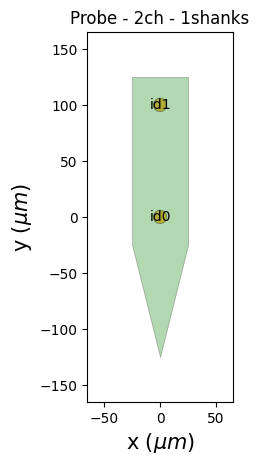

In [73]:
linear_probe = generate_linear_probe(num_elec=2, ypitch=100)
plot_probe(linear_probe, with_contact_id=True)